In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 87s 1us/step


In [3]:
# Normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

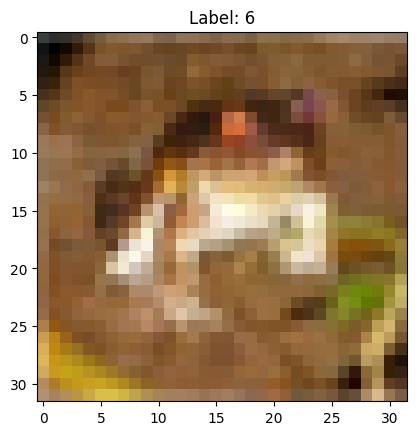

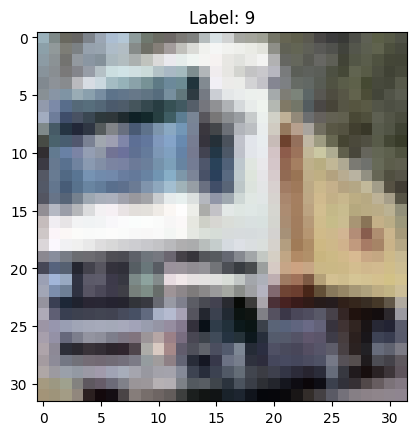

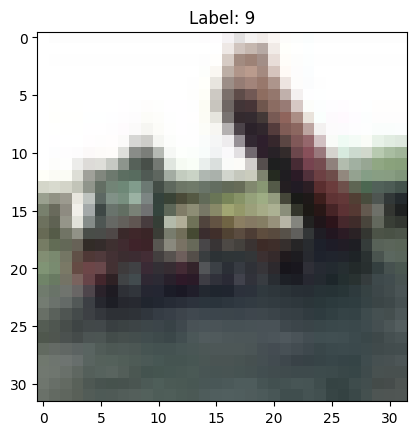

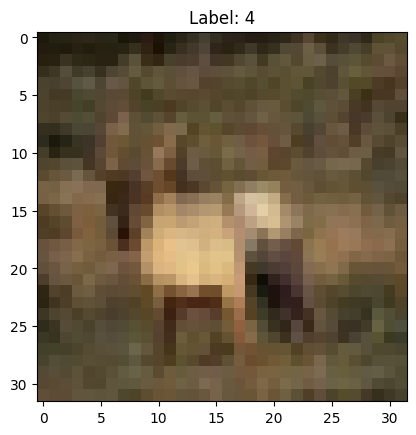

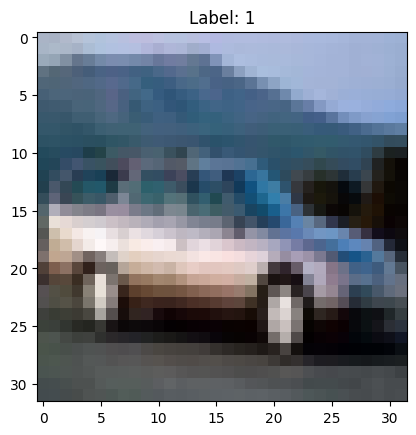

In [5]:
# Display some sample images
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.show()

In [11]:
def create_model(activation='relu', pooling='max'):
    model = models.Sequential()
    
    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    
    # Add pooling layer
    if pooling == 'max':
        model.add(layers.MaxPooling2D((2, 2)))
    elif pooling == 'avg':
        model.add(layers.AveragePooling2D((2, 2)))
    
    # Add dropout
    model.add(layers.Dropout(0.25))
    
    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [12]:
def experiment_with_models(activations, poolings, num_epochs=10, batch_size=64):
    results = []
    
    for activation in activations:
        for pooling in poolings:
            print(f"Training model with Activation: {activation}, Pooling: {pooling}")
            
            # Create and train the model
            model = create_model(activation=activation, pooling=pooling)
            history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,
                                validation_data=(x_test, y_test), verbose=1)
            
            # Evaluate the model
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
            print(f"Test Accuracy: {test_acc:.4f}")
            
            # Store the results
            results.append({
                'activation': activation,
                'pooling': pooling,
                'test_accuracy': test_acc,
                'history': history.history
            })
    
    return results


In [13]:
# Function to plot training vs. validation accuracy
def plot_results(results):
    for result in results:
        history = result['history']
        activation = result['activation']
        pooling = result['pooling']
        
        # Plot accuracy
        plt.figure(figsize=(10, 6))
        plt.plot(history['accuracy'], label='Training Accuracy')
        plt.plot(history['val_accuracy'], label='Validation Accuracy')
        plt.title(f"Activation: {activation}, Pooling: {pooling}")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid()
        plt.show()

# Function to summarize results
def summarize_results(results):
    summary = pd.DataFrame([{
        'Activation': result['activation'],
        'Pooling': result['pooling'],
        'Test Accuracy': result['test_accuracy']
    } for result in results])
    
    print(summary.sort_values(by='Test Accuracy', ascending=False))


Training model with Activation: relu, Pooling: max


c:\Users\Delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 155ms/step - accuracy: 0.4205 - loss: 1.6031 - val_accuracy: 0.6199 - val_loss: 1.0813
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 153ms/step - accuracy: 0.6358 - loss: 1.0259 - val_accuracy: 0.6686 - val_loss: 0.9666
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 139ms/step - accuracy: 0.6983 - loss: 0.8614 - val_accuracy: 0.6841 - val_loss: 0.9065
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.7377 - loss: 0.7390 - val_accuracy: 0.6775 - val_loss: 0.9224
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.7829 - loss: 0.6218 - val_accuracy: 0.6950 - val_loss: 0.8946
Test Accuracy: 0.6950
Training model with Activation: relu, Pooling: avg
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 115ms/step - accuracy: 0.3829 - loss: 1.6956 - val_accuracy: 0.5087 - val_loss: 1.3453
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.5977 - loss: 1.1478 - val_accuracy: 0.6189 - val_loss: 1.0618
Epoch 3/5
782

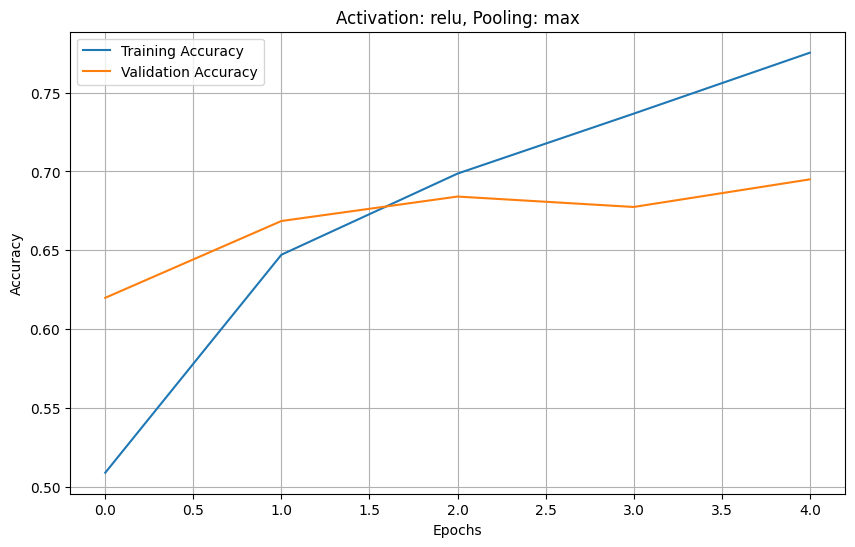

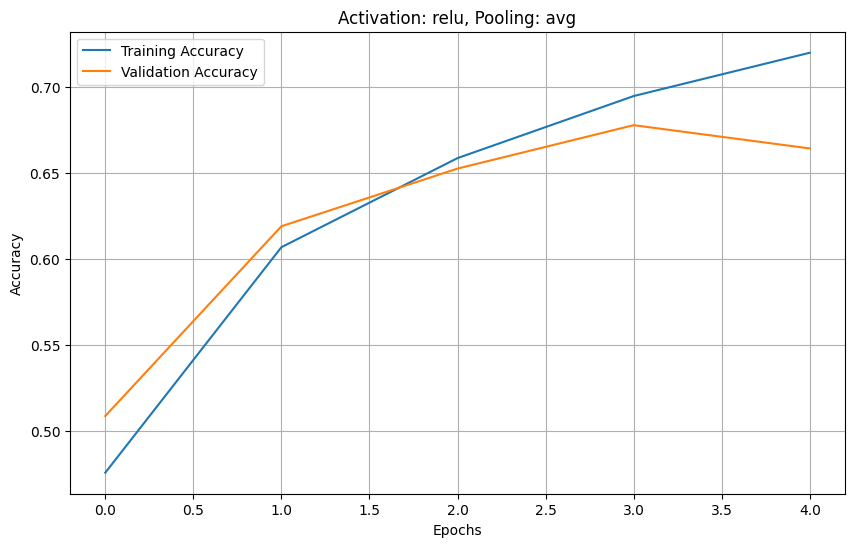

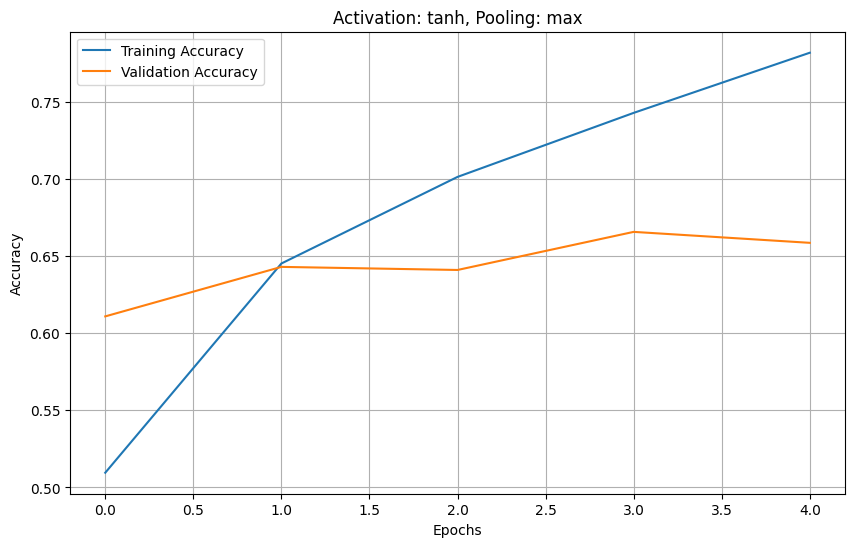

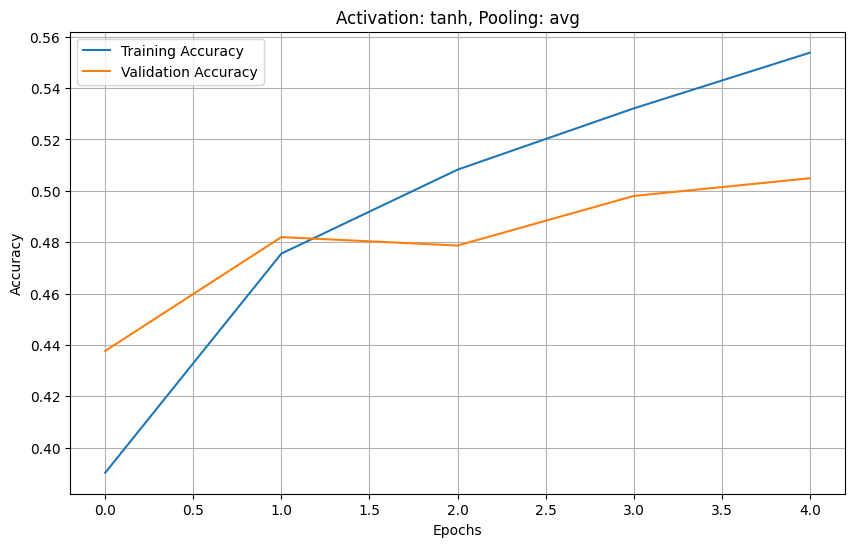

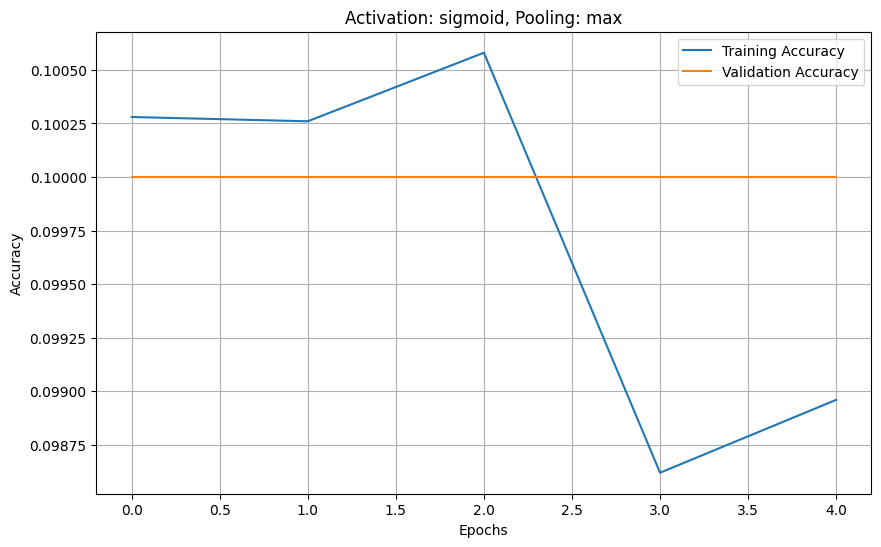

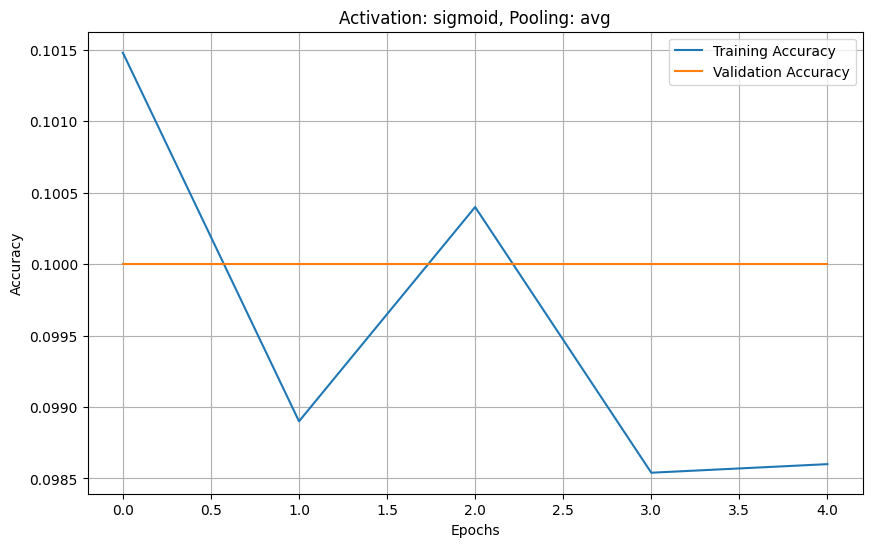

  Activation Pooling  Test Accuracy
0       relu     max         0.6950
1       relu     avg         0.6641
2       tanh     max         0.6586
3       tanh     avg         0.5049
4    sigmoid     max         0.1000
5    sigmoid     avg         0.1000


In [14]:
# Define the configurations to test
activations = ['relu', 'tanh', 'sigmoid']
poolings = ['max', 'avg']

# Run experiments
results = experiment_with_models(activations, poolings, num_epochs=5)

# Visualize the results
plot_results(results)

# Summarize the results
summarize_results(results)
